<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework2_part1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2.1 (24 points)

**Learning objectives:**

In this assignment, we will lay a foundation for advanced machine learning concepts by exploiting the simplicity of linear regression. We will explore:

* More advanced python features (functions, list comprehensions)
* Basics of gradient descent optimization
* Fitting models to data
* Ordinary least squares (linear) regression

---
Load the same libraries that we used in *Module 1*.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)

Now is also a good time to set the default font size to 16.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

---
## Part 1 (2 points)
Data is usually handed to us, rarely with knowledge of the process that generated it. Generating synthetic data is a great way to understand model fitting, and also a great way to confirm that your model **does what you expect it to do**! For this exercise we are going to generate our own data, and then fit a model to it.

Imagine you take one outdoor temperature reading every month of one year. Intuitively, you probably know that temperatures will rise in the summer, drop in the winter, and then rise again the following summer. A function that goes up and down and up and down is called....

To generate your own data, follow these steps:

* use [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), to generate a set of 12 time indices and call it `x`. For simplicity have those indices range from 0 to 1 - $\frac{1}{12}$ (subtract the $\frac{1}{12}$ so the indices don't loop back onto themself.

* Use `np.sin` to create a set of 12 temperature measurements called `y`. Be sure to set the frequency to a period of 1 year.

In [43]:
x=np.linspace(0,1-1/12,12)
y=np.sin(x*6)

* For plotting purposes, we want to sample time more densely. So create another time index array (call it `xplot`). Use `np.arange` to create a time index vector from 0 to 1 in steps of `0.01`.
* Plot `xplot` vs `np.sin(xplot)` (with appropriate frequency). It should look like you expect :)
* Label the `xlabel` with `month`, the `ylabel` with `Temperature`. Use [`plt.xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) to re-label the xticks with the months starting from `April` and also rotate the labels so you can read them.

Your plot should look like this:

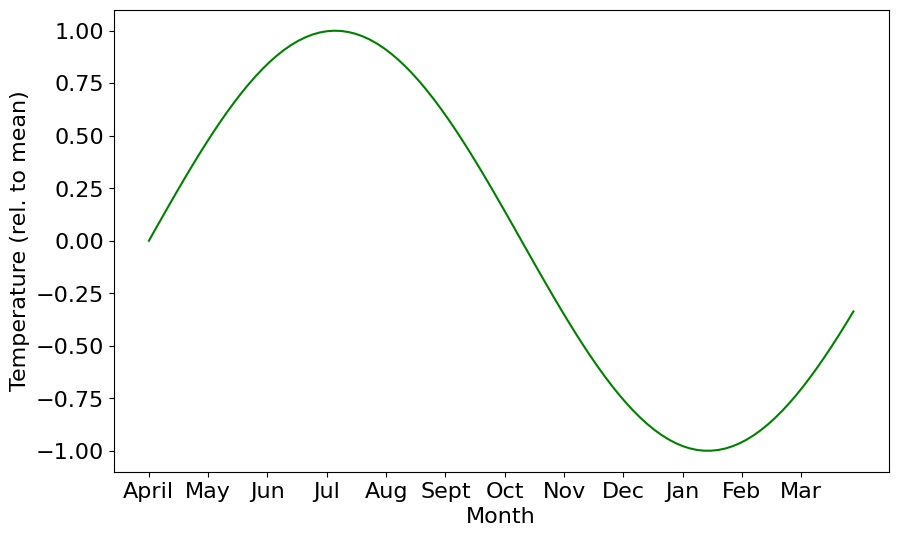

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(10,6))
xplot =np.arange(0,1,0.01)
yplot=np.sin(xplot*6)
plt.plot(xplot,yplot,'g')
plt.xlabel('Month')
plt.ylabel('Temperature (rel. to mean)')
label=('April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan','Feb','Mar')
plt.xticks(x,label)
plt.show()
plt.tight_layout()

To generate our real data, we want to add some noise to our `sin` function.

* Use `np.random.seed` and set the `seed=3`. This is so we all have the same random data.
* Add independent Gaussian noise with `std=0.15` to `y`. Call this noisy version of the `sin` function `t`.

In [45]:
np.random.seed(3)
t=np.random.normal(y,scale=0.15)


Now plot `t` alongside our `sin` function (at the `xplot` spacing)

Your plot should look like this:

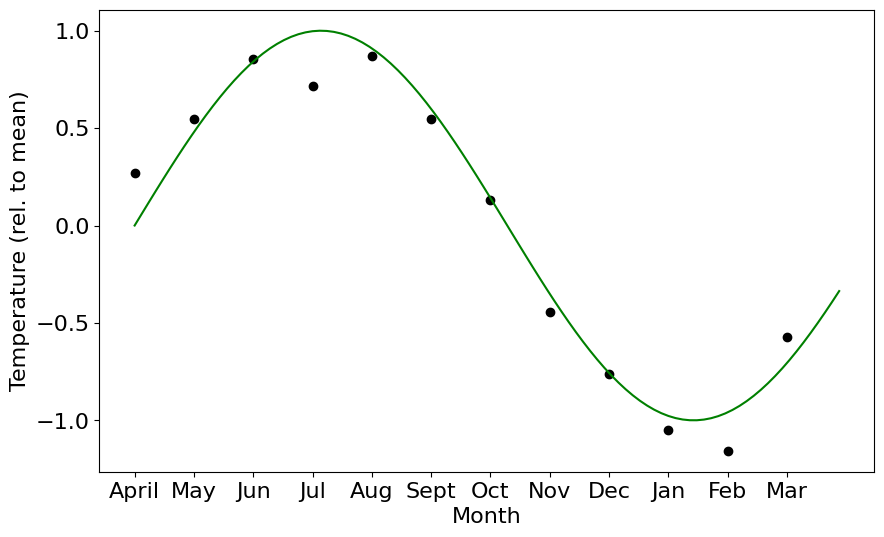

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(10,6))
plt.plot(xplot,yplot,'g')
plt.scatter(x,t,color='black')
plt.xlabel('Month')
plt.ylabel('Temperature (rel. to mean)')
label=('April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan','Feb','Mar')
plt.xticks(x,label)
plt.show()
plt.tight_layout()


---
## Part 2 (2 points)

We are going to take this opportunity to expand some of our python skills. We are going to work a bit more with [for loops](https://wiki.python.org/moin/ForLoop), [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions), and [functions](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

We are going to work with this functionality within the context of a walkthrough of linear regression. This assignment will have you approximate the data we just generated above with linear combinations of polynomial functions. This is typically referred to as [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression), which might seem like a nonlinear analysis (because we will be using higher-order polynomials) but is in fact linear because we *linearly* combine these nonlinear functions to predict the dependent variable `t`.

To prepare us to perform this regression, we have to get comfortable computing polynomial powers of `x`, our independent variable.

*  Write a `for` loop that creates a list in which each entry is a float equal to the **second order** polynomial (i.e. $(\cdot)^2$) of `x` (NOTE: *NOT* `xplot`). Check the documentation for dealing with [`lists`](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists).

* Achieve the same goal by exloiting the vectorized functionality of numpy arrays. In other words, do you actually need to apply the squaring operation element by element, or is there a simplier way?

* Use the `==` expression to verify you get the same result either way you do it.



In [47]:
a=[]
for i in range(len(x)):
  a.append((x[i])**2)
b=x**2
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Now

*  Write a **nested** `for` loop that creates a **list of lists** (🤯), in which each entry is a list of up to the n-th polynomial values of `x`, for orders 0 to 9.

* Achieve the same goal with a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).

* Confirm that they are equal using `np.array_equal`. (See [man page](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html))



In [48]:
A=[]
for i in range(0,10):
  a=[]
  for j in range(len(x)):
    a.append((x[j])**i)
  A.append(a)

squares = [[x[j]**i for j in range(len(x))]for i in range(10)]
np.array_equal(A,squares)

True

---
## Part 3 (2 points)

Functions make our lives much easier. When we write code that we use over and over again (as we are about to do) functions allow us to reuse the functionality we've written. We discussed the syntax of functions in lecture; if you need a reminder see: [`functions`](https://docs.python.org/3/tutorial/controlflow.html#defining-functions). Keep in mind that scoping is *NOT* the same in python as it is in matlab: see [here](https://www.datacamp.com/tutorial/scope-of-variables-python).

*  Write a function that takes `x` as an input and returns all polynomials up to order 9 of each entry of `x`.
* Execute the function to illustrate that it works. The output should be shape $10 \times 12$, so show that it is. (It is of dimension 10 becuase we are up to the 9-th order polynomial, and we are including the 0-th order.)



In [80]:
def poly(X,n):
  squares = [[X[j]**i for j in range(len(X))]for i in range(0,n)]
  return squares
n=10
print(poly(x,n))
np.shape(poly(x,n))


[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666], [0.0, 0.006944444444444444, 0.027777777777777776, 0.0625, 0.1111111111111111, 0.17361111111111108, 0.25, 0.3402777777777777, 0.4444444444444444, 0.5625, 0.6944444444444443, 0.8402777777777777], [0.0, 0.0005787037037037036, 0.0046296296296296285, 0.015625, 0.03703703703703703, 0.07233796296296294, 0.125, 0.1984953703703703, 0.2962962962962962, 0.421875, 0.5787037037037035, 0.7702546296296295], [0.0, 4.82253086419753e-05, 0.0007716049382716048, 0.00390625, 0.012345679012345677, 0.030140817901234556, 0.0625, 0.11578896604938266, 0.19753086419753083, 0.31640625, 0.4822530864197529, 0.7060667438271604], [0.0, 4.018775720164608e-06, 0.00012860082304526745, 0.0009765625, 0.004115226337448558, 0.012558674125514398, 0.03125, 0.06754356352880654, 0.1

(10, 12)

---
## Part 4 (2 points)

Recall that to model our data `t` with linear regression, we assume that a linear combination of polynomials will approximately equal our data: $$t_i \approx bX_i,$$

where $t_i$ is the i-th data point, $b$ is a $n$-dimension array and $X_i$ is a $n$-dimensional array of the i-th datapoint of `x` to polynomials up to power $n-1$.

To fit this model, we will have to use some more advanced linear algebra in python than we have been using. We'll first start with the dot product between `b` and `X_i`.

*  Create an array of `n` coefficients of Gaussian random variables with `std=0.01`. Call this array `b0`. Don't worry that its random; we are going to optimize our model soon, so it doesn't matter what the entries are.

*  Write a function that takes `x` and `b` as an input and returns the [dot product](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) of `b` with a matrix of all `x` values raised to polynomials of order $n - 1 = 9$. This function should use the function you defined previously for computing polynomial powers of `x`. The output should be of dimension 12 (for all 12 datapoints), so show that it is.

Recall that with linear regression, we want to find the $b$ the minimizes the sum of the squares of the difference between $t$ and $bX$:  $$J = \frac{1}{2}||t - bX||^2.$$ $J$ is typically referred to as an 'objective function'. (We will discuss later in this module why we use this particular critera for the objective function. For now just take it on faith that this is a good idea.)

*  Write a function that computes the sum of the squared difference between the $bX$ and our data $t$. This function should call the function you wrote previously for computing the dot product $bX$.

* Confirm that it returns a scalar value



In [50]:
n=10
b0 = np.random.normal(loc =0,scale =0.01,size=n)

def dotp(x,b):
  a=poly(x,n)
  prod = np.array(np.dot(b,a))
  return prod
print(np.shape(dotp(x,b0)))

def ssd(x,b,t):
  bx=dotp(x,b)
  J = 1/2*(np.sum((t-bx)**2))
  return J

J0=ssd(x,b0,t) # scalar value
print(J0)

(12,)
3.110697796915143


---
## Part 5 (2 points)

To compute the $b$ that minimizes our objective function we are going to perform [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). To do this, we need to compute the gradient of our objective function with respect to $b$: $\frac{\partial J}{\partial b}$.

*  Compute $\frac{\partial J}{\partial b}$ by hand. You don't need to show your work (unless you want to) because you will need to eventually code this up in python.

*  You may notice that your solution for $\frac{\partial J}{\partial b}$ has some complicated linear algebra operations. Here's a little practice for coding it up: compute the matrix product of `n-1` order polymials of `x` with its transpose and confirm it is of dimension $n \times n$.

*  Once you have computed $\frac{\partial J}{\partial b}$ by hand, write a python function that computes the gradient of our objective function given $t$, $x$, and $b$.

*  Confirm that it returns of vector of dimension `n`




In [51]:
practice = np.dot(poly(x,n), np.transpose(poly(x,n)))
print(np.shape(practice))

def gradient(t,x,b):
  dJ_db = np.dot(np.dot(poly(x,n), np.transpose(poly(x,n))),b)-np.dot(t,np.transpose(poly(x,n)))
  np.shape(dJ_db)
  return dJ_db
dJ0 =gradient(t,x,b0)
print(dJ0)


(10, 10)
[0.20319328 2.15969121 2.10630946 1.78789461 1.47373252 1.21116729
 1.00051985 0.83286489 0.69898029 0.59125857]


---
## Part 6 (2 points)

Now that we have python functions for our objective function and our gradient, we are ready to optimize $b$. Recall that the expression for gradient descent is: $$b_i = b_{i-1} - \alpha \frac{\partial J(t, x, b_{i-1})}{\partial b_{i-1}}.$$

*  Write a for loop to perform gradient descent. Use a step size of $\alpha = 0.1$. Take `20_000` gradient steps. Recall that we set the initial value of `b` above.

*  Compute the value of the objective at each iteration. Once your for loop is complete, plot the values of $J$ over the descent. As you might expect, it should go down: i.e. the difference between $t$ and $bX$ is getting smaller as we find a better $b$. Label your axes with something logical.

Your plot should look like this:



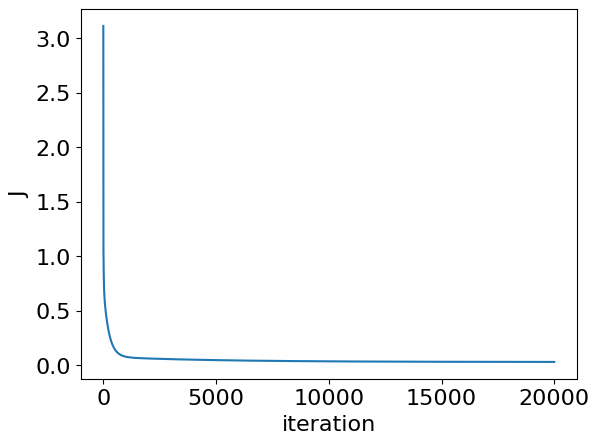

In [52]:
a = 0.1
steps = np.arange(0,20000)
b = [[0]*n]*len(steps) #2000x10
b[0] = b0
dJ = [[0]*n]*len(steps)
J = [0]*len(steps)
J[0] =J0
for i in steps-1:
  dJ[i] = (gradient(t,x,b[i]))
  b[i+1] = b[i] -a*(dJ[i])
  J[i+1] = ssd(x,b[i+1],t)
B=np.array(b[-1])
J[0] =J0
# print(J)

plt.plot(steps,J)
plt.xlabel('iteration')

plt.ylabel('J')
plt.show()

---
## Part 7 (2 points)

Unlike more complicated models that we will get to later, linear regression is one of the most well-studied models, with strong guarantees regarding its optimization AND analytic forms for the minimizer.

* The analytic solution can be solved on paper and pencil by solving when $\frac{\partial J}{\partial b} = 0$. Compute this by hand. You don't need to show your work because you have to code it in python anyway.

*  Compute the closed form solution of OLS in python. [`numpy.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html) is your friend; be sure to import is as `import numpy.linalg as linalg`.

*  Plot the analytic solution as a line against the steps of gradient descent.

Your plot should look like this:

Text(0, 0.5, 'J')

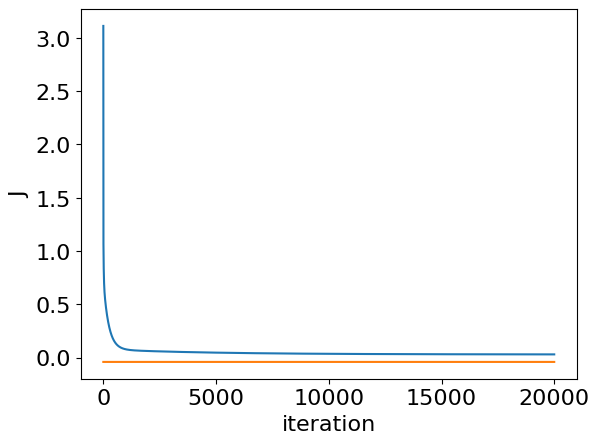

In [53]:
import numpy.linalg as linalg

def ols(x, t):
    X = poly(x,n)
    Xty= t @ np.transpose(X)
    np.shape(Xty)
    A = Xty@(np.linalg.inv(X@ np.transpose(X)))
    return A
result = ols(x,t)
results = [np.sum(ols(x,t))+5.5]*len(steps)
plt.plot(steps,J)
plt.plot(steps,np.array(results))
plt.xlabel('iteration')
plt.ylabel('J')

---
## Part 8 (2 points)

One of the amazing things about python (and other open source languages) is the rich ecosystem of packages. These packages help us so we don't have to reinvent the wheel everytime we do an analysis. (Although, in this case, we wanted you all to do it from the ground up to learn something!)

Within the `linalg` submodule of `numpy` there is a function called `lstsq` for performing least squares regression. Check the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) about how to use it.

*  Perform regression using `lstsq`.
*  Plot the solution from `lstsq` as a line against the steps of gradient descent.

Your plot should look like this:

Text(0, 0.5, 'J')

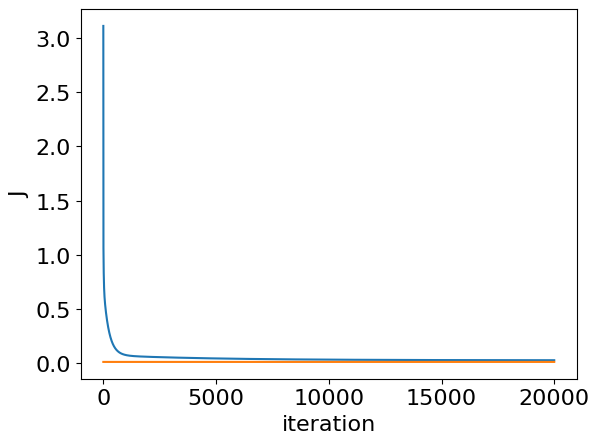

In [54]:
a = np.transpose(poly(x,n))
S = np.linalg.lstsq(a,t,rcond=None)[1]
s= [S]*len(steps)

plt.plot(steps,J)
plt.plot(steps,np.array(s))
plt.xlabel('iteration')
plt.ylabel('J')

---
## Part 9 (2 points)

Now that we've computed the optimal $b$ three ways, let's take a look at what it produces.

Plot:

* the data we used to fit the model, i.e. `t` and `x` as **dots**.
* the true underlying function `sin()` at the resolution of the `xplot` indices as a **green line**.
* $bX$ from our gradient descent solution, at `xplot` resolution as a **blue line**.
* $bX$ from our analytic solution at `xplot` resolution as a **cyan line**.
* $bX$ from our `lstsq` solution at `xplot` resolution as a **red dotted line**.
* Be sure to label your axes as we did above.
* Add a legend to keep the different lines clear.

<font color='red'>**SHORT ANSWER:** Describe the most prominent feature of the closed form and regression solution. (For the time being ignore anything you might notice about the gradient descent solution.) In what way is it qualitatively different than the `sin` function used to generate the data?

Your plot should look like this:

The most prominent feature of the closed-form and regression solutions is that it provides a polynomial approximation to the underlying data. This polynomial curve attempts to capture the overall trend or pattern in the data points by fitting a curve that minimizes the squared differences between the observed data and the predicted values.The polynomial curve may have local extrema and inflection points, leading to more intricate shapes compared to the smooth and regular sinusoidal pattern of the sine function.

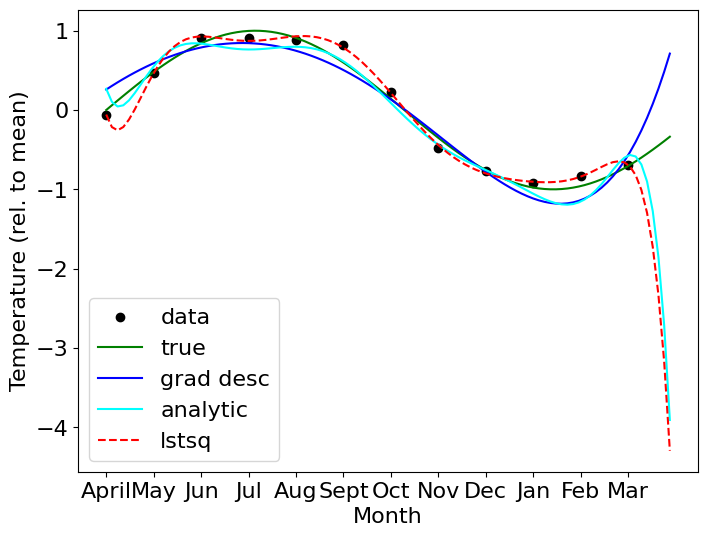

<Figure size 640x480 with 0 Axes>

In [37]:
xplot =np.arange(0,1,0.01)

plt.figure(figsize=(8,6))

plt.scatter(x,t,color='black',label='data')

plt.plot(xplot,yplot,'g',label='true')

yB=[]
for o in xplot:
  yb=0
  for N in range(n):
    yb+=B[N]*o**N
  yB.append(yb)

plt.plot(xplot,yB,'b',label='grad desc')

rB=[]
for m in xplot:
  yb=0
  for N in range(n):
    yb+=result[N]*m**N
  rB.append(yb)
np.shape(rB)

plt.plot(xplot,rB,'cyan',label='analytic')
sB=[]
S=np.linalg.lstsq(a,t,rcond=None)[0]
for m in xplot:
  yb=0
  for N in range(n):
    yb+=S[N]*m**N
  sB.append(yb)
np.shape(sB)

plt.plot(xplot,sB,'r--',label='lstsq')

plt.xlabel('Month')
plt.ylabel('Temperature (rel. to mean)')
label=('April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan','Feb','Mar')
plt.xticks(x,label)
plt.legend(loc='lower left')
plt.show()
plt.tight_layout()

To get a clearer picture how the sum of these polynomial functions produce an approximation to the `sin` function, plot some sums of the polynomials, increaseing from only the 0-th order entry, the 0-th and 1-st, etc. Plot the 0-th order only, 0-th through 3-rd order, and 0-th through 6-th order. Plot them in different colors so you can distinguish them, and also plot the data, and include a legend. Use the gradient descent least squares solution.

**You should notice that as we add higher order polynomails, we get closer to the data**.

Your plot should look like this:

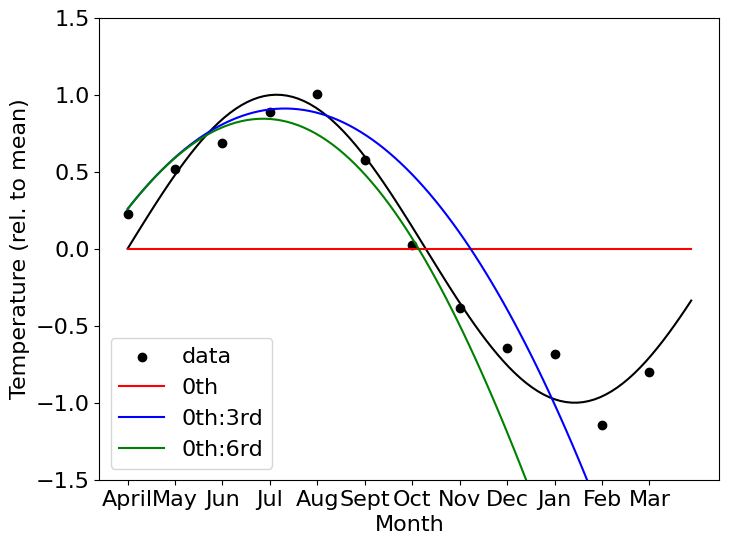

<Figure size 640x480 with 0 Axes>

In [55]:

plt.figure(figsize=(8,6))

plt.scatter(x,t,color='black',label='data')
plt.plot(xplot,yplot,'k')
yB=[]
for o in xplot:
  yb=0
  for N in range(0):
    yb+=B[N]*o**N
  yB.append(yb)

plt.plot(xplot,yB,'r',label='0th')
yB=[]
for o in xplot:
  yb=0
  for N in range(3):
    yb+=B[N]*o**N
  yB.append(yb)

plt.plot(xplot,yB,'b',label='0th:3rd')

yB=[]
for o in xplot:
  yb=0
  for N in range(6):
    yb+=B[N]*o**N
  yB.append(yb)

plt.plot(xplot,yB,'g',label='0th:6rd')

plt.xlabel('Month')
plt.ylabel('Temperature (rel. to mean)')
label=('April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan','Feb','Mar')
plt.xticks(x,label)
plt.ylim([-1.5,1.5])
plt.legend(loc='lower left')
plt.show()
plt.tight_layout()

---
## Part 10 (2 points)

Why did we select the learning rate for gradient descent to be what we did? Let's explore! Perform gradient descent again with a learning rate `100` times smaller. (See the power of writing functions now!??!)

<font color='red'>**SHORT ANSWER:** What do you notice that is different compared to the larger learning rate?

Plot the objective function across gradient iterations, as above, for both learning rates.

Your plot should look like this:

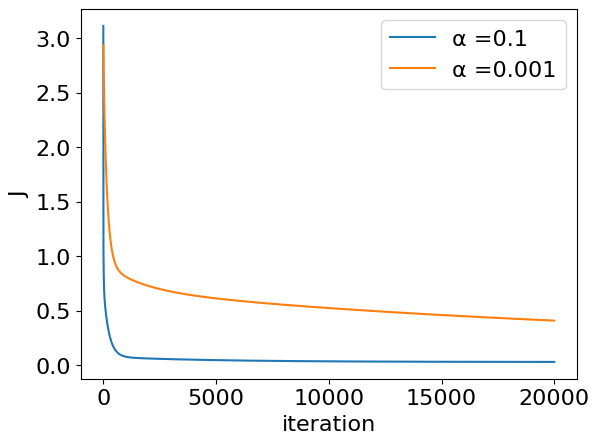

In [56]:
a = 0.001
steps = np.arange(0,20000)
b = [[0]*n]*len(steps) #2000x10
b[0] = b0
dJ = [[0]*n]*len(steps)
J_100 = [0]*len(steps)
J_100[0] =J0
for i in steps-1:
  dJ[i] = (gradient(t,x,b[i]))
  b[i+1] = b[i] -a*(dJ[i])
  J_100[i+1] = ssd(x,b[i+1],t)
B=np.array(b[-1])
# print(B)

plt.plot(steps,J,label='\u03B1 =0.1')
plt.plot(steps,J_100,label='\u03B1 =0.001')
plt.xlabel('iteration')
plt.ylabel('J')
plt.legend()
plt.show()


---
## Part 11 (2 points)
Perform gradient descent ($\alpha = 0.1$), solve for the analytic form of ordinary least squares, and perform regression using `lstsq` **AGAIN** but this time, with polynomials up to order 3. (Note that you will have to reinitialize $b$, and change the number of coefficients in it.)

<font color='red'>**SHORT ANSWER:** What do you notice that is different compared to using polynomials up to order 9? This is an example of something we will discuss extensively throughout the rest of the module and is a critical concept in more advanced machine learning methods.

Plot the results of all three solutions for up to order 3 polynomial approximation, like we did above.

Your plot should look like this:

A. The higher order polynomial solutions tend to overfit the data versus the smaller polynomial solutions resulting ina  more precise fit.

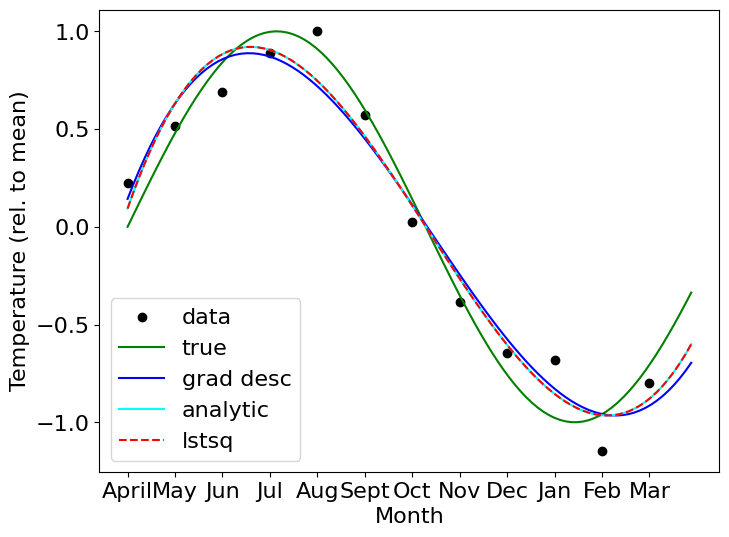

<Figure size 640x480 with 0 Axes>

In [58]:
n=4
b0 = np.random.normal(loc =0,scale =0.01,size=n)

a = 0.1
steps = np.arange(0,20000)
b = [[0]*n]*len(steps) #2000x3
b[0] = b0
dJ = [[0]*n]*len(steps)
J = [0]*len(steps)
J[0] =J0
for i in steps-1:
  dJ[i] = (gradient(t,x,b[i]))
  b[i+1] = b[i] -a*(dJ[i])
  J[i+1] = ssd(x,b[i+1],t)
B=np.array(b[-1])
J[0] =J0

def ols(x, t):
    X = poly(x,n)
    Xty= t @ np.transpose(X)
    np.shape(Xty)
    A = Xty@(np.linalg.inv(X@ np.transpose(X)))
    return A
result = ols(x,t)
results = [np.sum(ols(x,t))]*len(steps)

a = np.transpose(poly(x,n))
S = np.linalg.lstsq(a,t,rcond=None)[1]
s= [S]*len(steps)

plt.figure(figsize=(8,6))
plt.scatter(x,t,color='black',label='data')

plt.plot(xplot,yplot,'g',label='true')

yB=[]
for o in xplot:
  yb=0
  for N in range(n):
    yb+=B[N]*o**N
  yB.append(yb)

plt.plot(xplot,yB,'b',label='grad desc')

rB=[]
for m in xplot:
  yb=0
  for N in range(n):
    yb+=result[N]*m**N
  rB.append(yb)
np.shape(rB)

plt.plot(xplot,rB,'cyan',label='analytic')
sB=[]
S=np.linalg.lstsq(a,t,rcond=None)[0]
for m in xplot:
  yb=0
  for N in range(n):
    yb+=S[N]*m**N
  sB.append(yb)
np.shape(sB)

plt.plot(xplot,sB,'r--',label='lstsq')

plt.xlabel('Month')
plt.ylabel('Temperature (rel. to mean)')
label=('April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan','Feb','Mar')
plt.xticks(x,label)
plt.legend(loc='lower left')
plt.show()
plt.tight_layout()

---
## Part 12 (2 points)

Now, perform gradient descent ($\alpha = 0.01$), solve for the analytic form of ordinary least squares, and perform regression using `lstsq` **AGAIN** with polynomials up to order 9, **BUT** with the data at `xplot` resolution.(Note that you will have to reinitialize $b$, and change the number of coefficients in it.)

**NOTE**: You have to regenerate $t$ for the case when we have more data. Use `seed=3` again and generate the **noisy** data just as we did before.

**Notice** that we are now using 100 datapoints (10 times as many)!

<font color='red'>**SHORT ANSWER:** What do you notice that is different compared to using only 10 datapoints, when using polynomials up to order 9? This is also an example of something we will discuss extensively throughout the rest of the module and is a critical concept in more advanced machine learning methods.

Plot the results of all three solutions like we did above.

Your plot should look like this:

A. The larger dataset tends to generate lesser error in fiting across various  methods.

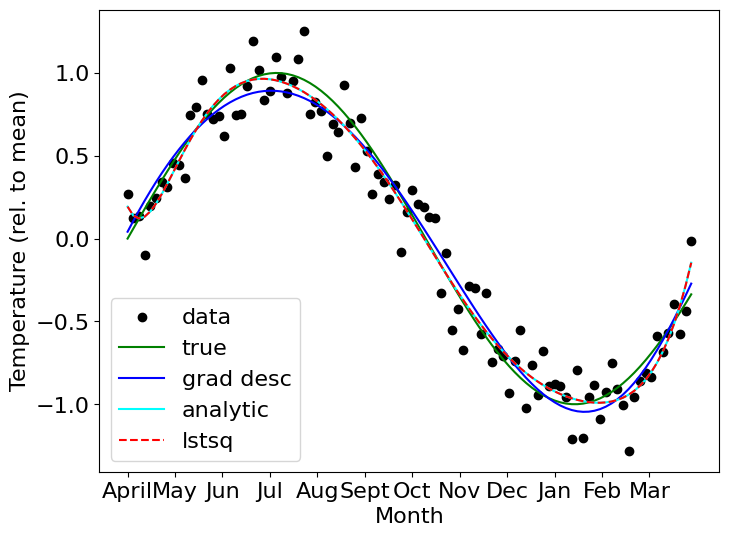

<Figure size 640x480 with 0 Axes>

In [82]:
n=10
xplot =np.arange(0,1,0.01)
np.random.seed(3)
tplot=np.random.normal(yplot,scale=0.15)

b0 = np.random.normal(loc =0,scale =0.01,size=n)

a = 0.01
steps = np.arange(0,20000)
b = [[0]*n]*len(steps) #2000x3
b[0] = b0
dJ = [[0]*n]*len(steps)
J = [0]*len(steps)
J[0] =J0
for i in steps-1:
  dJ[i] = (gradient(tplot,xplot,b[i]))
  b[i+1] = b[i] -a*(dJ[i])
  J[i+1] = ssd(xplot,b[i+1],tplot)
B=np.array(b[-1])
J[0] =J0

def ols(x, t):
    X = poly(x,n)
    Xty= t @ np.transpose(X)
    np.shape(Xty)
    A = Xty@(np.linalg.inv(X@ np.transpose(X)))
    return A
result = ols(xplot,tplot)
results = [np.sum(ols(xplot,tplot))]*len(steps)

a = np.transpose(poly(xplot,n))
S = np.linalg.lstsq(a,tplot,rcond=None)[1]
s= [S]*len(steps)

plt.figure(figsize=(8,6))
plt.scatter(xplot,tplot,color='black',label='data')

plt.plot(xplot,yplot,'g',label='true')

yB=[]
for o in xplot:
  yb=0
  for N in range(n):
    yb+=B[N]*o**N
  yB.append(yb)

plt.plot(xplot,yB,'b',label='grad desc')

rB=[]
for m in xplot:
  yb=0
  for N in range(n):
    yb+=result[N]*m**N
  rB.append(yb)
np.shape(rB)

plt.plot(xplot,rB,'cyan',label='analytic')
sB=[]
S=np.linalg.lstsq(a,t,rcond=None)[0]
for m in xplot:
  yb=0
  for N in range(n):
    yb+=S[N]*m**N
  sB.append(yb)
np.shape(sB)

plt.plot(xplot,sB,'r--',label='lstsq')

plt.xlabel('Month')
plt.ylabel('Temperature (rel. to mean)')
label=('April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan','Feb','Mar')
plt.xticks(x,label)
plt.legend(loc='lower left')
plt.show()
plt.tight_layout()

---
## Final thoughts

We increased and decreased the number of polynomials we used to fit our model AND we increased and decreased the amount of data, and we saw different results that depended on these choices. Guess, if you can, how these things are related to each other in this model. Comment on outcomes with varying amounts of data and polynomials in the fit and how these two factors relate to each other.

the number of polynomials represent the number of features in the model. The higher the polynomial the more complex the data. The orders of polynomial were varied to text model complexity. The amount of data or the ruchness of the dataset size affects the robustness of the fit. as there is more data to sample from and therefore a better estimation of the fit.